In [7]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from plotly.subplots import make_subplots
import pandas as pd
import time
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from feature_extraction import mir_utils as miru
import plotly_express as px
import plotly.graph_objs as go
import ipywidgets as widgets
import os
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
df=pd.read_csv("./csvs/feat_autoencoder_linear.csv",error_bad_lines=False)
## drop some stuff
not_want=['noise','piano','guitar',"voc","5_stack","3_stack","1_stack","tom_mid","tom_low"]
df=df[~df.label.isin(not_want)].reset_index()
df = df[df.columns.drop(list(df.filter(regex='env_shape')))]
df["path"]="what"
# df=df.drop(['l'],axis=1)
##
n_neighbors = 10
X=df.loc[:, ~df.columns.isin(['label','path'])].values

min_max_scaler = preprocessing.MinMaxScaler()
X = np.nan_to_num(X)

X = min_max_scaler.fit_transform(X)

time_start = time.time()
# tsne = TSNE(n_components=2, random_state=0, perplexity=80, verbose=1)
tsne = Isomap(n_neighbors, n_components=2)
# tsne = LocallyLinearEmbedding(n_neighbors,n_components=4)
# tsne = SpectralEmbedding(n_neighbors=16,n_components=5,random_state=1)
X_2d = tsne.fit_transform(X)

df2=pd.concat([df["path"],df["label"],pd.Series(X_2d[:,0]),pd.Series(X_2d[:,1])],axis=1)
df2.columns=["path","label","v1","v2"]
df2

,path,label,v1,v2
0,what,kick,-0.688260,0.354618
1,what,kick,-0.759719,0.454102
2,what,kick,-0.675653,0.228987
3,what,kick,-1.297730,-0.128644
4,what,kick,-0.622199,-0.472465
...,...,...,...,...
687,what,hihat_open,0.834306,-0.344629
688,what,hihat_open,0.864426,-0.581277
689,what,hihat_open,1.665941,2.226776
690,what,hihat_open,0.860891,-0.617735


In [3]:
p = px.scatter(df2, x="v1",
                 y="v2",color="label",hover_data=["path"],color_discrete_sequence=px.colors.qualitative.Dark24)
for trace in p.data:
    trace.update(hoverinfo="none",hovertemplate= '')

def hover_fn(trace, points, state):
    if points.point_inds:
        ind = points.point_inds[0]
        drmName=trace.customdata[ind][0][2:]
        filename=os.getcwd()+drmName
        os.system("play %s trim 0 0.5 &" % filename)
        hover_data.value = str(drmName)+"\n"
        
hover_data = widgets.Textarea()  
layout = go.Layout(hovermode=False)
fig  = go.FigureWidget(p)
for f in fig.data:
    f.on_hover(hover_fn)

display(fig,widgets.HBox([hover_data]))

FigureWidget({
    'data': [{'customdata': array([['what'],
                                   ['what'],
     …

t-SNE done! Time elapsed: 1.1920928955078125e-06 seconds


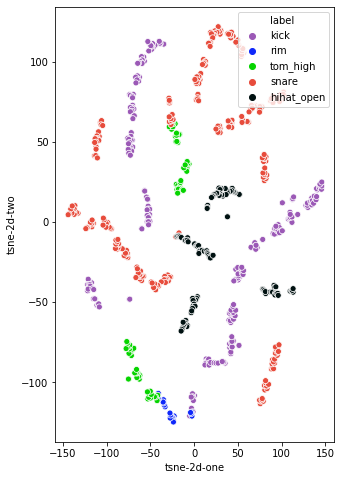

In [8]:
miru.plotTSNE(df)